In [ ]:
from numpy import *
from pylab import *
import random

In [ ]:
#adaptive
def addaptive(inputcurrent):
    T = 100 # total time to simulate 
    dt = 0.125 # simulation time step (msec)
    time = arange(0, T+dt, dt) # time array
    t_rest = 0 
    u = np.zeros(len(time)) # potential (u) trace over time
    R = 1 # resistance (kOhm)
    C = 12 # capacitance (uF)
    tm = R*C # time constant (msec)
    tref = 1 # refractory period (msec)
    Vth = 3 # spike threshold (V)
    V_spike = 0.5 # spike delta (V)
    I = [] # input current (A)
    deltaT = 0.5
    V_rest = 0
    tw = 1
    a = 1
    b = 1
    urest = 0
    counter = 0
    w = 0
    thetaRH = 1
    for i, t in enumerate(time):
        I.append(inputcurrent)
        if t>t_rest:
            w = w + ( dt / tw ) * ( a * (u[i-1] - V_rest) - w + b * tw * counter )
            u[i] = u[i - 1] + ((-u[i - 1] + V_rest - R * w + I[i] * R + deltaT * (np.exp((u[i - 1]- thetaRH)/deltaT))) / tm) * dt
            if u[i] > Vth:
                counter += 1
                u[i] += V_spike      
                t_rest = t + tref
        else:u[i] = V_rest
    plot(time, u)
    title('Adaptive Exponentialy Leaky Integrate-and-Fire')
    ylabel('U(v)')
    xlabel('Time (msec)')
    show()
    plot(time , I)
    title('input in time')
    ylabel('I')  
    xlabel('time')
    show()
addaptive(5)  



In [ ]:
#random adaptive
def randomaddaptive():
    T = 100 # total time to simulate 
    dt = 0.125 # simulation time step (msec)
    time = arange(0, T+dt, dt) # time array
    t_rest = 0 
    u = np.zeros(len(time)) # potential (u) trace over time
    R = 1 # resistance (kOhm)
    C = 12 # capacitance (uF)
    tm = R*C # time constant (msec)
    tref = 1 # refractory period (msec)
    Vth = 3 # spike threshold (V)
    V_spike = 0.5 # spike delta (V)
    I = [] # input current (A)
    deltaT = 0.5
    V_rest = 0
    tw = 1
    a = 1
    b = 1
    urest = 0
    counter = 0
    w = 0
    thetaRH = 1
    for i, t in enumerate(time):
        I.append(random.randrange(10,20))
        if t>t_rest:
            w = w + ( dt / tw ) * ( a * (u[i-1] - V_rest) - w + b * tw * counter )
            u[i] = u[i - 1] + ((-u[i - 1] + V_rest - R * w + I[i] * R + deltaT * (np.exp((u[i - 1]- thetaRH)/deltaT))) / tm) * dt
            if u[i] > Vth:
                counter += 1
                u[i] += V_spike      
                t_rest = t + tref
        else:u[i] = V_rest
    plot(time, u)
    title('Adaptive Exponentialy Leaky Integrate-and-Fire')
    ylabel('U(v)')
    xlabel('Time (msec)')
    show()
    plot(time , I)
    title('input in time')
    ylabel('I')  
    xlabel('time')
    show()
while j<5:randomaddaptive()

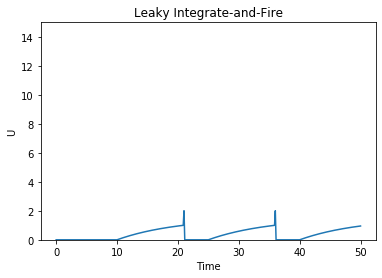

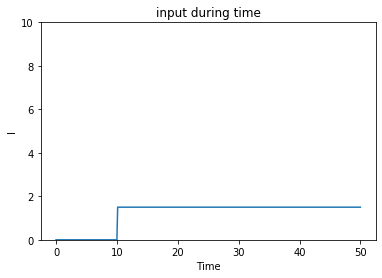

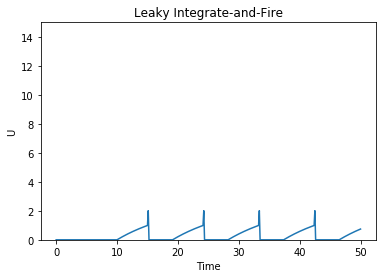

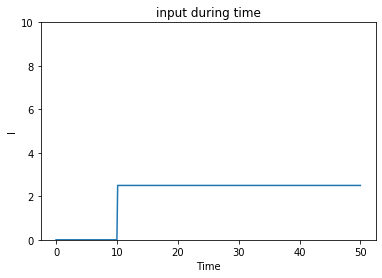

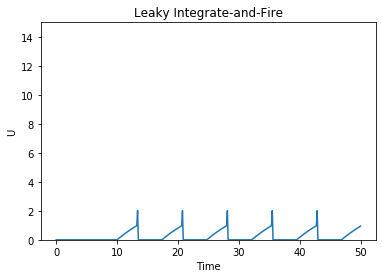

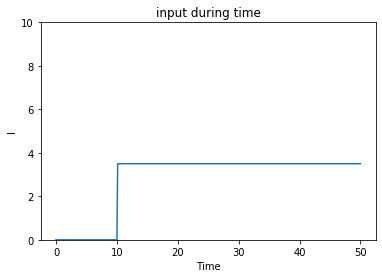

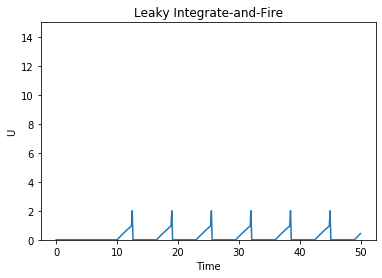

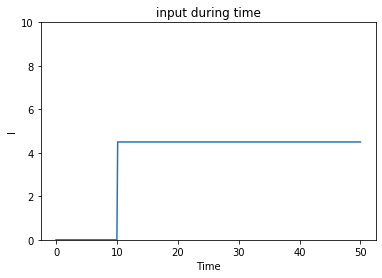

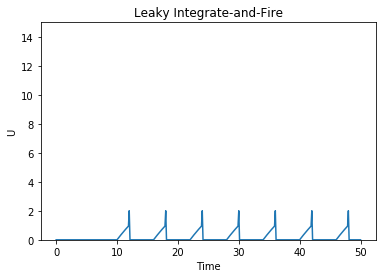

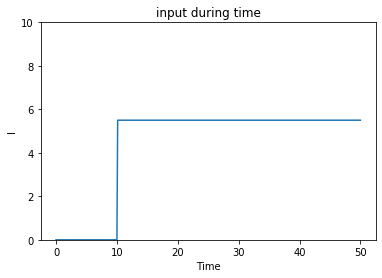

In [16]:
# leaky integrate and fire model with diffrent input
# setup parameters and state variables
frequency=[]
for j  in range (5):
  T =  50                  # total time to simulate (msec)	
  dt = 0.125               # simulation time step (msec)	
  time= arange(0, T+dt, dt) # time array	
  tref=4
  t_rest  = 0                   # initial refractory time	
  u     = zeros(len(time))    # potential (V) trace over time
  R     = 1                 # resistance (kOhm)
  C      = 10                  # capacitance (uF)	
  tm   = R*C            # constant 	
  spike_treshold  = 1          # spike threshold (V)	
  V_spike = 1                # spike delta (V)	
  t_spike=[]
  I= []                # input current (A)
## iterate over each time step	
  for i, t in enumerate(time):
    if t>10 :
      I.append(1.5+(j))
    else:
      I.append(0)
    if t > t_rest:
      u[i] = u[i-1] + (-u[i-1] + I[i]*R) / tm * dt
    if u[i] >= spike_treshold:
      u[i] += V_spike
      t_rest = t + tref
      t_spike.append(t_rest)
  #print(t_spike)
  frequency.append(1/(t_spike[1]-t_spike[0]))
  plot(time, u)
  title('Leaky Integrate-and-Fire')	
  ylabel('U')	
  xlabel('Time')	
  ylim([0,15])
  show()
  plot(time , I )
  title('input during time')	
  ylabel('I')	
  xlabel('Time')	
  ylim([0,10])
  show()
#print(frequency)


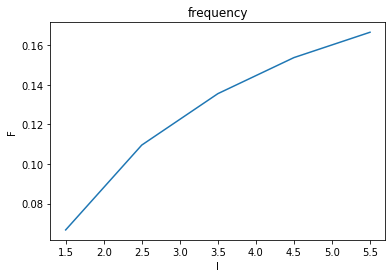

In [17]:
#frequancy plot
I=[1.5,2.5,3.5,4.5,5.5]
plot(I,frequency)
title('frequency')	
ylabel('F')	
xlabel('I')
show()

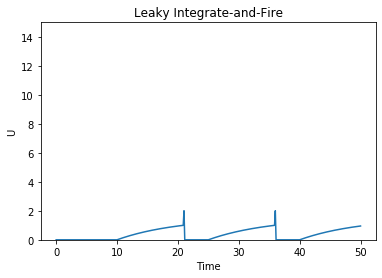

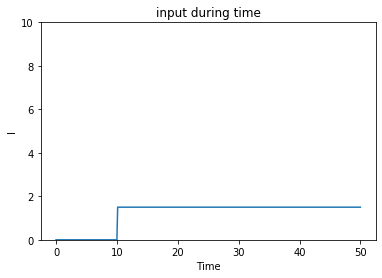

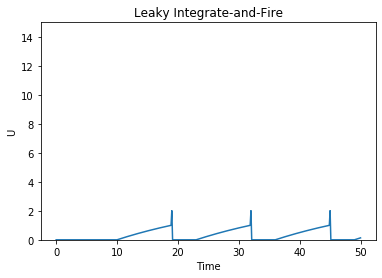

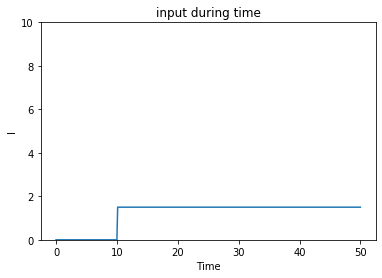

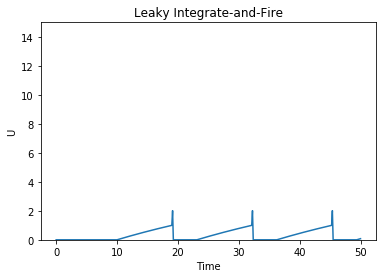

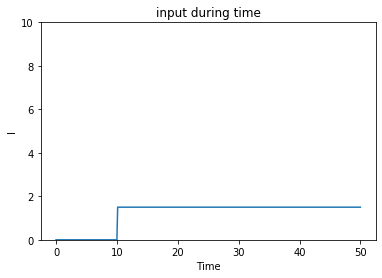

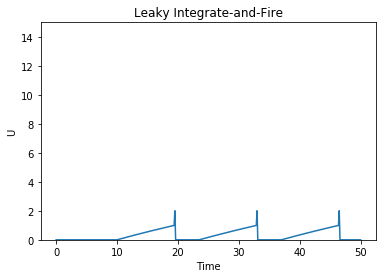

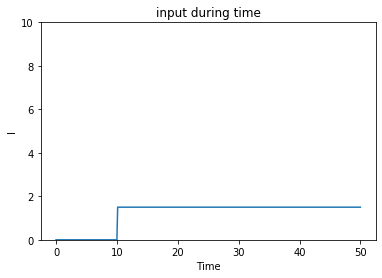

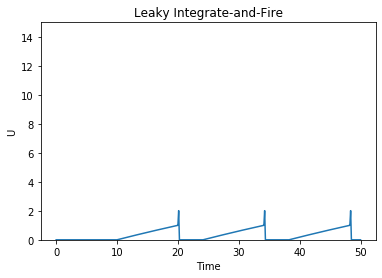

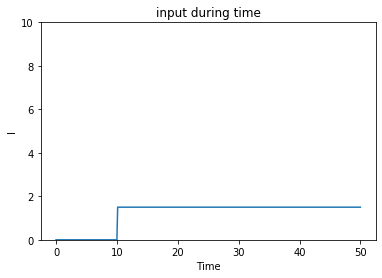

In [15]:
#when R and C change while the input is the same
for j  in range (5):
  T =  50                  # total time to simulate (msec)	
  dt = 0.125               # simulation time step (msec)	
  time= arange(0, T+dt, dt) # time array	
  tref=4
  t_rest  = 0                   # initial refractory time	
  u     = zeros(len(time))    # potential (V) trace over time
  R     = 1+j                # resistance (kOhm)
  C      = 10 +j                 # capacitance (uF)	
  tm   = R*C            # constant 	
  spike_treshold  = 1          # spike threshold (V)	
  V_spike = 1                # spike delta (V)	
  I= []                # input current (A)
## iterate over each time step	
  for i, t in enumerate(time):
    if t>10 :
      I.append(1.5)
    else:
      I.append(0)
    if t > t_rest:
      u[i] = u[i-1] + (-u[i-1] + I[i]*R) / tm * dt
    if u[i] >= spike_treshold:
      u[i] += V_spike
      t_rest = t + tref
  plot(time, u)
  title('Leaky Integrate-and-Fire')	
  ylabel('U')	
  xlabel('Time')	
  ylim([0,15])
  show()
  plot(time , I )
  title('input during time')	
  ylabel('I')	
  xlabel('Time')	
  ylim([0,10])
  show()


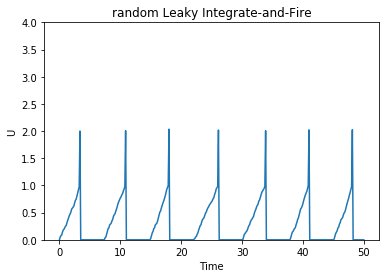

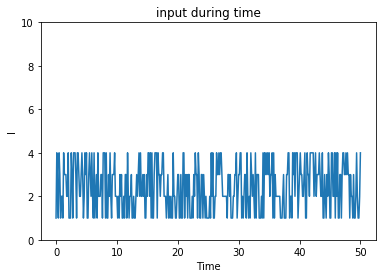

In [14]:
#arbitrary input
T =  50                  # total time to simulate (msec)	
dt = 0.125               # simulation time step (msec)	
time= arange(0, T+dt, dt) # time array	
t_rest  = 0                   # initial refractory time	
u     = zeros(len(time))    # potential (V) trace over time
R     = 1                 # resistance (kOhm)
C      = 10                  # capacitance (uF)	
tm   = R*C            # constant 	
spike_treshold  = 1          # spike threshold (V)	
V_spike = 1                # spike delta (V)	
I= []                # input current (A)
tref=4
## iterate over each time step	
for i, t in enumerate(time):
  I.append(random.randrange(1,5))
  if t > t_rest:
    u[i]=u[i-1]-(dt/tm)*(u[i]-u[i-1]-R*I[i])
    #u[i] = u[i-1] + (-u[i-1] + I[i]*R) / tm * dt
  if u[i] >= spike_treshold:
    u[i] += V_spike
    t_rest = t + tref
plot(time, u)
title('random Leaky Integrate-and-Fire')	
ylabel('U')	
xlabel('Time')	
ylim([0,4])
show()
plot(time , I )
title('input during time')	
ylabel('I')	
xlabel('Time')	
ylim([0,10])
show()


[0.10810810810810811]


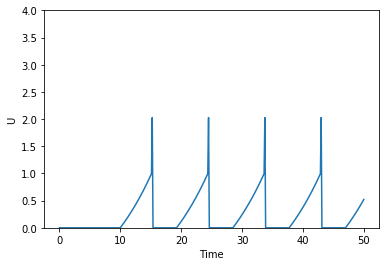

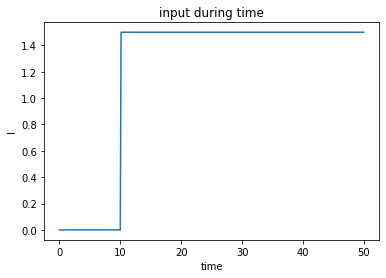

[0.10810810810810811, 0.13333333333333333]


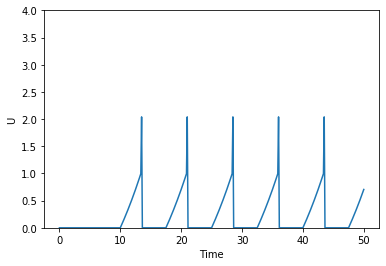

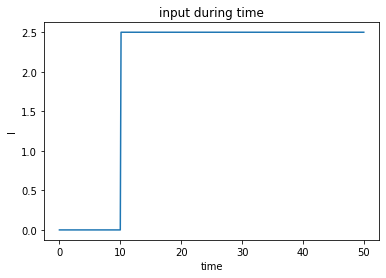

[0.10810810810810811, 0.13333333333333333, 0.1509433962264151]


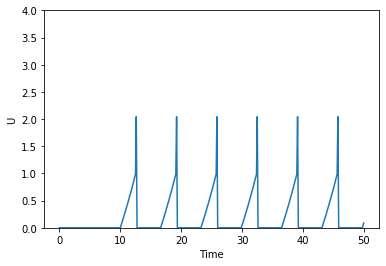

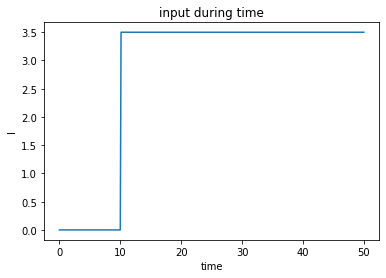

[0.10810810810810811, 0.13333333333333333, 0.1509433962264151, 0.16326530612244897]


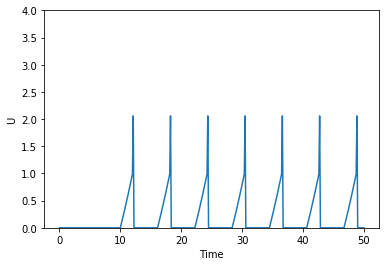

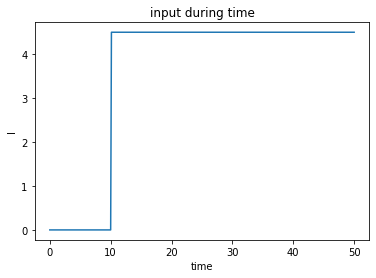

[0.10810810810810811, 0.13333333333333333, 0.1509433962264151, 0.16326530612244897, 0.17391304347826086]


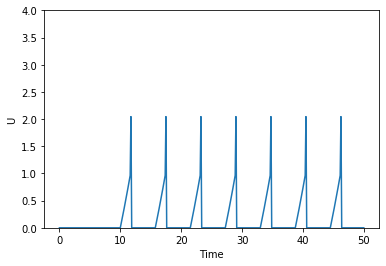

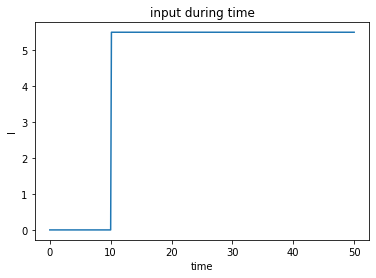

In [63]:
#exp LIF
frequency=[]
for j in range(5):
    T=50
    dt=0.125
    t_rest=0
    time= arange(0, T+dt, dt) 
    u=zeros(len(time))
    u_rest=0
    R=1
    C=10
    tm=R*C
    deltaT=.01
    treshold=1
    firing_treshold=2
    V_spike= 1
    tref=4
    I=[]
    t_spike=[]
    for i, t in enumerate(time):
        if t>10:  I.append(1.5+j)
        else:I.append(0)
        if t>t_rest and I!=0:
            u[i]=(-(u[i]-u[i-1])*dt/tm)+(R*dt*I[i]/tm+u[i-1])+(dt*deltaT*(pow(e,(u[i]-firing_treshold)/deltaT))/tm)
        if u[i]>treshold:
            if u[i] >= firing_treshold:
                u[i] = u_rest
            else:u[i]+=V_spike
            t_rest = t + tref
            t_spike.append(t_rest)
    frequency.append(1/(t_spike[1]-t_spike[0]))
    #print(frequency)
    plot(time, u)
    ylabel('U')	
    xlabel('Time')	
    ylim([0,4])
    show()
    plot(time,I)
    title('input during time')
    xlabel('time')
    ylabel('I')
    show()


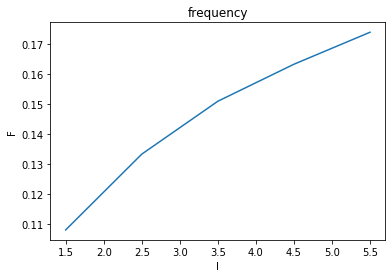

In [64]:
#frequancy plot
I=[1.5,2.5,3.5,4.5,5.5]
plot(I,frequency)
title('frequency')	
ylabel('F')	
xlabel('I')
show()

In [ ]:
#random exp lif
T =  50                  	
dt = 0.125               
time= arange(0, T+dt, dt) 
t_rest  = 0                   
u     = zeros(len(time))    
R     = 1                 
C      = 10                  	
tm   = R*C            	
spike_treshold  = 1.5         
treshold=1
tref=4
V_spike = 1        	
I= []                
deltaT=0.001

for i, t in enumerate(time):
  if t>10:I.append(random.randrange(0,5))
  else :I.append(0)
  if t > t_rest :
     u[i]=(-(u[i]-u[i-1])*dt/tm)+(R*dt*I[i]/tm+u[i-1])+(dt*deltaT*(pow(e,(u[i]-firing_treshold)/deltaT))/tm)
     if u[i]>treshold:
        if u[i] >= firing_treshold:
            u[i] = u_rest
        else:u[i]+=V_spike
        t_rest = t + tref
plot(time, u)
title('arbitrary exp Leaky Integrate-and-Fire')	
ylabel('U')	
xlabel('Time')	
ylim([0,4])
show()
plot(time,I)
title('input during time')
xlabel('time')
ylabel('I')
show()
